# Assignment for Week 8 - Reinforcement Learning
## Q-Learning
**Objective**: Reproduce the exercise explained in the following tutorial videos:

- https://www.youtube.com/watch?v=yMk_XtIEzH8&list=PLQVvvaa0QuDezJFIOU5wDdfy4e9vdnx-7
- https://www.youtube.com/watch?v=Gq1Azv_B4-4
- https://www.youtube.com/watch?v=CBTbifYx6a8
<br><br>
These videos are accompanied by the following:
- Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.1
- Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.2
- Q-Learning introduction and Q Table - Reinforcement Learning w/ Python Tutorial p.3


**Important**: In working through the code listed on the webpages, there are a number of errors that prevent the demo from performing correctly. The code shown int he videos is correct!

**NOTE**: You don't need to reproduce all of the graphs demostrated in the third video for this assignment. Please include 2 of the demonstrated graphs.

## Deliverables:
Upload your notebook's .ipynb file and a screenshot of your car reaching it's goal.

**Important**: Make sure your provide complete and thorough explanations for all of your analysis. You need to defend your thought processes and reasoning.

In [1]:
# Dependencies
import gym
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Environment setup
env = gym.make('MountainCar-v0')
env.reset()

/home/tosterberg/.local/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:97: UserWarning: WARN: We recommend you to use a symmetric and normalized Box action space (range=[-1, 1]) https://stable-baselines3.readthedocs.io/en/master/guide/rl_tips.html
  logger.warn(


array([-0.45825565,  0.        ], dtype=float32)

In [3]:
# Constants
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 30001
SAVE_EVERY = 100
SHOW_EVERY = 2000
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low) / DISCRETE_OS_SIZE

In [4]:
# Exploration
epsilon = 0.5
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING = EPISODES // 2
epsilon_decay_value = epsilon / (END_EPSILON_DECAYING - START_EPSILON_DECAYING)

In [5]:
# Setup Q-Table
q_table = np.random.uniform(low=-2, high=0, size=(DISCRETE_OS_SIZE + [env.action_space.n]))

In [6]:
# Metrics
ep_completion_episodes = []
ep_rewards = []
aggr_ep_rewards = {'ep': [], 'avg': [], 'min': [], 'max': []}


In [7]:
def get_discrete_state(state):
    # Function to return the correct discrete bucket our current state is in
    ds = (state - env.observation_space.low) / discrete_os_win_size
    return tuple(ds.astype(int))

In [8]:
for episode in range(EPISODES):
    episode_reward = 0
    done = False
    discrete_state = get_discrete_state(env.reset())

    # Core loop for agent interaction with the environment
    while not done:
        if np.random.random() > epsilon:
            # Do best action from Q-Table
            action = np.argmax(q_table[discrete_state])
        else:
            # Do a random action
            action = np.random.randint(0, env.action_space.n)
        # Step forward and recalculate
        new_state, reward, done, _ = env.step(action)
        new_discrete_state = get_discrete_state(new_state)
        episode_reward += reward
        
        if not done:
            # Calculate values and propagate reward
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            # Calculate our new Q-value
            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)
            q_table[discrete_state + (action, )] = new_q
        elif new_state[0] >= env.goal_position:
            ep_completion_episodes.append(episode)
            q_table[discrete_state + (action, )] = 0
        # Move state forward to new state
        discrete_state = new_discrete_state
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon -= epsilon_decay_value

    # Append metrics
    ep_rewards.append(episode_reward)
    if not episode % SAVE_EVERY:
        # Save Q-Table
        np.save(f'q-tables/{episode}-qtable.npy', q_table)
    if not episode % SHOW_EVERY:
        # Append aggregate metrics
        average_reward = sum(ep_rewards[-SHOW_EVERY:]) / len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards['avg'].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        print(f'Episode: {episode}, Average: {average_reward}, Min: {min(ep_rewards[-SHOW_EVERY:])} ' +
              f'Max: {max(ep_rewards[-SHOW_EVERY:])}, Epsilon: {epsilon:0.3f}')
# Close the environment after training
env.close()

Episode: 0, Average: -200.0, Min: -200.0 Max: -200.0, Epsilon: 0.500
Episode: 2000, Average: -199.8085, Min: -200.0 Max: -157.0, Epsilon: 0.433
Episode: 4000, Average: -198.0735, Min: -200.0 Max: -153.0, Epsilon: 0.367
Episode: 6000, Average: -196.354, Min: -200.0 Max: -151.0, Epsilon: 0.300
Episode: 8000, Average: -189.63, Min: -200.0 Max: -125.0, Epsilon: 0.233
Episode: 10000, Average: -181.096, Min: -200.0 Max: -115.0, Epsilon: 0.167
Episode: 12000, Average: -175.6285, Min: -200.0 Max: -122.0, Epsilon: 0.100
Episode: 14000, Average: -167.5425, Min: -200.0 Max: -109.0, Epsilon: 0.033
Episode: 16000, Average: -163.6895, Min: -200.0 Max: -103.0, Epsilon: -0.000
Episode: 18000, Average: -146.861, Min: -200.0 Max: -108.0, Epsilon: -0.000
Episode: 20000, Average: -140.395, Min: -158.0 Max: -112.0, Epsilon: -0.000
Episode: 22000, Average: -140.107, Min: -156.0 Max: -112.0, Epsilon: -0.000
Episode: 24000, Average: -139.2785, Min: -152.0 Max: -112.0, Epsilon: -0.000
Episode: 26000, Average: 

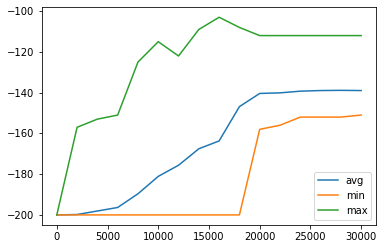

In [9]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label='avg')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label='min')
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label='max')
plt.legend(loc=4)
plt.show()

### A successful completion of our Mountain Car Example reaching the goal
**Note**: I snagged the render from my .py file instead of the jupyter file as my jupyter instance is on WSL and does not have access to my video drivers. I have attached both for this assignment.
<img src="mountain_car_goal.jpg" />